In [1]:
# Import Libraries

import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Connect to the Database & create Cursor

conn = sqlite3.connect('crimes.db')
c = conn.cursor()

In [3]:
# Create the 'crimes_on_women' table

try: 
    c.execute('''
    CREATE TABLE crimes_on_women (
        'STATE/UT' TEXT,
        'DISTRICT' TEXT,
        'Year' TEXT,
        'Rape' INTEGER,
        'Kidnapping and Abduction' INTEGER,
        'Dowry Deaths' INTEGER,
        'Assault on women with intent to outrage her modesty' INTEGER,
        'Insult to modesty of Women' INTEGER,
        'Cruelty by Husband or his Relatives' INTEGER,
        'Importation of Girls' INTEGER
    )
''')
except:
    print('table already exists or unable to create')


table already exists or unable to create


In [4]:
#connect to your database
engine = create_engine('sqlite:///crimes.db')

**3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table**

In [5]:
# Read the data from csv and st

df = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')
df['Year'] = df['Year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   Year                                                 9017 non-null   object
 3   Rape                                                 9017 non-null   int64 
 4   Kidnapping and Abduction                             9017 non-null   int64 
 5   Dowry Deaths                                         9017 non-null   int64 
 6   Assault on women with intent to outrage her modesty  9017 non-null   int64 
 7   Insult to modesty of Women                           9017 non-null   int64 
 8   Cruelty by Husband or his Relatives                  9017 non-null   int64 
 9

In [6]:
# Convert DF back to sql database

df.to_sql('crimes_on_women', conn, if_exists='replace', index=False)

9017

#### 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [7]:
df1 = pd.read_sql_query('''SELECT "STATE/UT","DISTRICT","Year" ,max("Rape"+"Kidnapping and Abduction") FROM crimes_on_women 
                        where "DISTRICT" not in('TOTAL','DELHI UT TOTAL')
                        group by "STATE/UT","DISTRICT"	,"Year" order by max("Rape"+"Kidnapping and Abduction" ) desc limit 1 ''' , conn)
df1.shape
df1

,STATE/UT,DISTRICT,Year,"max(""Rape""+""Kidnapping and Abduction"")"
0,WEST BENGAL,MURSHIDABAD,2010,967


#### 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [8]:
df2 = pd.read_sql_query('''SELECT "STATE/UT","DISTRICT","Year" ,min("Rape"+"Kidnapping and Abduction") FROM crimes_on_women 
                        where "DISTRICT" not in('TOTAL','DELHI UT TOTAL')
                        group by "STATE/UT","DISTRICT"	,"Year" order by min("Rape"+"Kidnapping and Abduction"  ) limit 1  ''' , conn)
df2

,STATE/UT,DISTRICT,Year,"min(""Rape""+""Kidnapping and Abduction"")"
0,A & N ISLANDS,NICOBAR,2001,0


#### 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [9]:
district_frm = pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')
district_frm['Year'] = district_frm['Year'].astype('object')
district_frm.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

In [10]:
district_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 0 to 9017
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              9018 non-null   object
 1   DISTRICT                              9018 non-null   object
 2   Year                                  9018 non-null   object
 3   Murder                                9018 non-null   int64 
 4   Rape                                  9018 non-null   int64 
 5   Kidnapping Abduction                  9018 non-null   int64 
 6   Dacoity                               9018 non-null   int64 
 7   Robbery                               9018 non-null   int64 
 8   Arson                                 9018 non-null   int64 
 9   Hurt                                  9018 non-null   int64 
 10  Protection of Civil Rights (PCR) Act  9018 non-null   int64 
 11  Prevention of atrocities (POA)

#### creating crimes_against_st table

In [11]:
# Create the 'crimes_against_st' table
try:
    c.execute('''
    CREATE TABLE crimes_against_st (
        'STATE/UT' TEXT,
        'DISTRICT' TEXT,
        'Year' TEXT,
        'Murder' INTEGER,
        'Rape' INTEGER,
        'Kidnapping Abduction' INTEGER,
        'Dacoity' INTEGER,
        'Robbery' INTEGER,
        'Arson' INTEGER,
        'Hurt' INTEGER,
        'Protection of Civil Rights (PCR) Act' INTEGER,
        'Prevention of atrocities (POA) Act' INTEGER,
        'Other Crimes Against STs' INTEGER
    )
''')
    
except:
    print('table already exists or unable to create')

table already exists or unable to create


In [12]:
district_frm.to_sql('crimes_against_st', conn, if_exists='replace', index=False)

9018

In [13]:
dist_cr_st = pd.read_sql(''' select * from crimes_against_st''',conn)
dist_cr_st.shape
dist_cr_st.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

#### 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [14]:
crimes_st = pd.read_sql(''' select "DISTRICT" , max("Dacoity"+"Robbery") dac_rob  from crimes_against_st 
                        where "DISTRICT" != 'TOTAL'  group by "DISTRICT" order by dac_rob desc limit 1''',conn)
crimes_st

,DISTRICT,dac_rob
0,DAHOD,60


#### 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [15]:
crimes_st1 = pd.read_sql(''' select distinct("DISTRICT") from (select "DISTRICT" , sum("Murder") s from crimes_against_st 
                         group by "DISTRICT" order by s   asc) as t  ''',conn)

district_murder_st_list = list(crimes_st1['DISTRICT'])
district_murder_st_list

['24 PARGANAS NORTH',
 '24 PARGANAS SOUTH',
 'A and N ISLANDS',
 'AGRA',
 'AHWA-DANG',
 'AIZAWL',
 'AKOLA',
 'ALAPUZHA',
 'ALMORA',
 'AMBALA',
 'AMBALA RURAL',
 'AMBALA URBAN',
 'AMBEDKAR NAGAR',
 'AMRAVATI COMMR.',
 'AMRELI',
 'AMRITSAR',
 'AMRITSAR RURAL',
 'ANANTNAG',
 'ANJAW',
 'ARIYALUR',
 'ARWAL',
 'ASANSOL',
 'AURAIYA',
 'AURANGABAD',
 'AURANGABAD COMMR.',
 'AWANTIPORA',
 'AZAMGARH',
 'BADAUN',
 'BADDIPOLICEDIST',
 'BAGAHA',
 'BAGESHWAR',
 'BAGHPAT',
 'BAHRAICH',
 'BAKSA',
 'BALASORE',
 'BALLIA',
 'BALOD',
 'BALODA BAZAR',
 'BANDA',
 'BANDIPORA',
 'BANGALORE RURAL',
 'BANKA',
 'BANKURA',
 'BARABANKI',
 'BARAMULLA',
 'BAREILLY',
 'BARNALA',
 'BARPETA',
 'BASKA',
 'BASTI',
 'BATALA',
 'BDN CP',
 'BEGUSARAI',
 'BEMETARA',
 'BERHAMPUR',
 'BETTIAH',
 'BHABHUA',
 'BHADRAK',
 'BHATINDA',
 'BHAVNAGAR',
 'BHIM NAGAR',
 'BHIWANI',
 'BHOJPUR',
 'BHOPAL RLY.',
 'BIDAR',
 'BIEO',
 'BIJAPUR',
 'BIJNOR',
 'BIKANER',
 'BISHNUPUR',
 'BIZAPUR',
 'BKP CP',
 'BOKARO',
 'BONGAIGAON',
 'BORDER',
 'BO

#### 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [16]:
crimes_st2 = pd.read_sql(''' select "DISTRICT" ,"Year", sum("Murder") s from crimes_against_st where "DISTRICT" != 'TOTAL'
                         group by "DISTRICT","Year" order by s,"Year","DISTRICT"   asc   ''',conn)
crimes_st2

,DISTRICT,Year,s
0,24 PARGANAS NORTH,2001,0
1,24 PARGANAS SOUTH,2001,0
2,ADILABAD,2001,0
3,AGRA,2001,0
4,AHMEDABAD COMMR.,2001,0
...,...,...,...
8402,KOHIMA,2002,22
8403,SIMDEGA,2003,22
8404,KOHIMA,2003,23
8405,KOHIMA,2001,24


#### 3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [17]:
#creating table for ipc crimes
# Create the 'ipc_crimes_murder_rape' table

try:
    c.execute('''
    CREATE TABLE ipc_crimes_murder_rape (
        'STATE/UT' TEXT,
        'DISTRICT' TEXT,
        'YEAR' TEXT,
        'MURDER' INTEGER,
        'ATTEMPT TO MURDER' INTEGER,
        'RAPE' INTEGER,
        'CUSTODIAL RAPE' INTEGER,
        'OTHER RAPE' INTEGER
    )
''')
    
except:
    print('table exists or cant create table')


table exists or cant create table


##### 3.8.2 Inserting 01_District_wise_crimes_committed_IPC_2001_2012.csv into ipc_crimes_murder_rape table

In [18]:
ipc = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
print(ipc.shape)
ipc = ipc[['STATE/UT' , 'DISTRICT' ,'YEAR' ,  'MURDER' ,  'ATTEMPT TO MURDER' ,
        'RAPE' , 'CUSTODIAL RAPE', 'OTHER RAPE' ]]
print(ipc.shape)

(8609, 33)
(8609, 8)


In [19]:
ipc.to_sql('ipc_crimes_murder_rape' , conn, if_exists='replace', index=False)

8609

In [20]:
ipc_crimes_mr = pd.read_sql(''' select "STATE/UT","YEAR","DISTRICT",max("MURDER") Highest_Murders from ipc_crimes_murder_rape 
                            where "DISTRICT" not in ('TOTAL' , 'DELHI UT TOTAL')
                            group by "STATE/UT","YEAR","DISTRICT" 
                            order by "STATE/UT","YEAR","DISTRICT" ,"Highest_Murders" desc ''', conn)
pd.set_option('display.max_rows', 1000)
ipc_crimes_mr.head(10)

,STATE/UT,YEAR,DISTRICT,Highest_Murders
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2001,NICOBAR,0
2,A & N ISLANDS,2002,ANDAMAN,14
3,A & N ISLANDS,2002,NICOBAR,3
4,A & N ISLANDS,2003,ANDAMAN,16
5,A & N ISLANDS,2003,NICOBAR,5
6,A & N ISLANDS,2004,ANDAMAN,13
7,A & N ISLANDS,2004,NICOBAR,2
8,A & N ISLANDS,2005,ANDAMAN,14
9,A & N ISLANDS,2005,NICOBAR,0


#### 3.8.3 analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [26]:
# Group by 'STATE/UT' and 'DISTRICT', and filter districts appearing 3 or more years
ipc_mr_group = ipc_crimes_mr.groupby(['STATE/UT', 'DISTRICT'])

ipc_3 = ipc_mr_group.filter(lambda x: len(x) >= 3)
ipc_sort= ipc_3.sort_values(by=['STATE/UT', 'DISTRICT','Highest_Murders', 'YEAR'], ascending=True)
pd.set_option('display.max_rows', 75)
print(ipc_sort[['STATE/UT', 'DISTRICT', 'Highest_Murders', 'YEAR']].head(15))

         STATE/UT DISTRICT  Highest_Murders  YEAR
10  A & N ISLANDS  ANDAMAN                3  2006
13  A & N ISLANDS  ANDAMAN                8  2008
17  A & N ISLANDS  ANDAMAN                8  2010
0   A & N ISLANDS  ANDAMAN               13  2001
6   A & N ISLANDS  ANDAMAN               13  2004
2   A & N ISLANDS  ANDAMAN               14  2002
8   A & N ISLANDS  ANDAMAN               14  2005
19  A & N ISLANDS  ANDAMAN               14  2011
15  A & N ISLANDS  ANDAMAN               15  2009
4   A & N ISLANDS  ANDAMAN               16  2003
1   A & N ISLANDS  NICOBAR                0  2001
9   A & N ISLANDS  NICOBAR                0  2005
14  A & N ISLANDS  NICOBAR                0  2008
16  A & N ISLANDS  NICOBAR                0  2009
20  A & N ISLANDS  NICOBAR                0  2011


#### 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

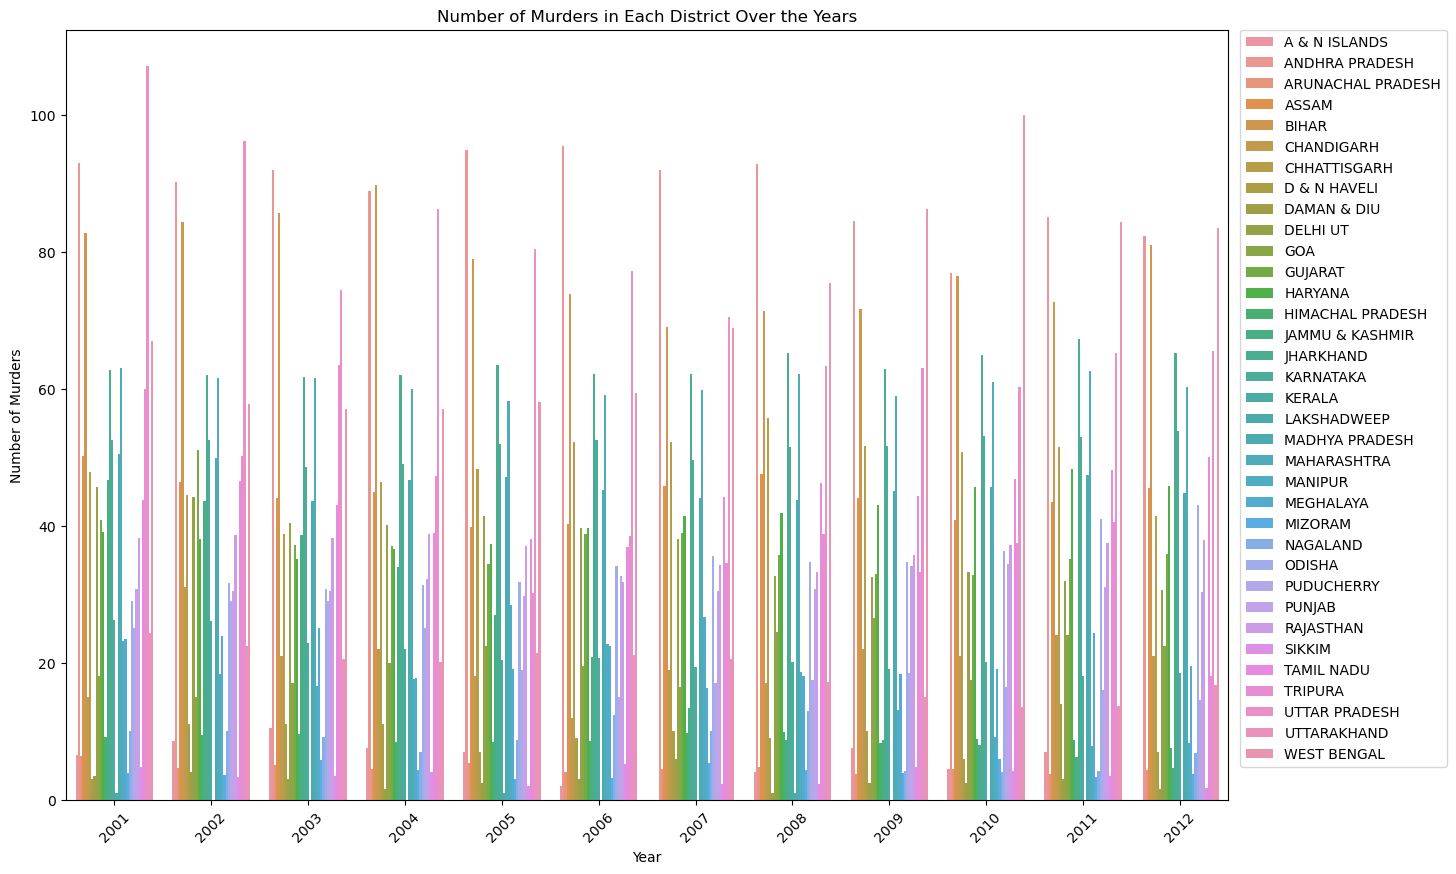

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sorted_data' is the DataFrame from the previous step
plt.figure(figsize=(15,10))
chart = sns.barplot(x='YEAR', y='Highest_Murders', hue='STATE/UT', data=ipc_3, ci=None)
plt.title('Number of Murders in Each District Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Murders')

# Place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# Rotate x-axis labels for better readability
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.show()

**Observations:**

1. Max crime can be seen in 2001 

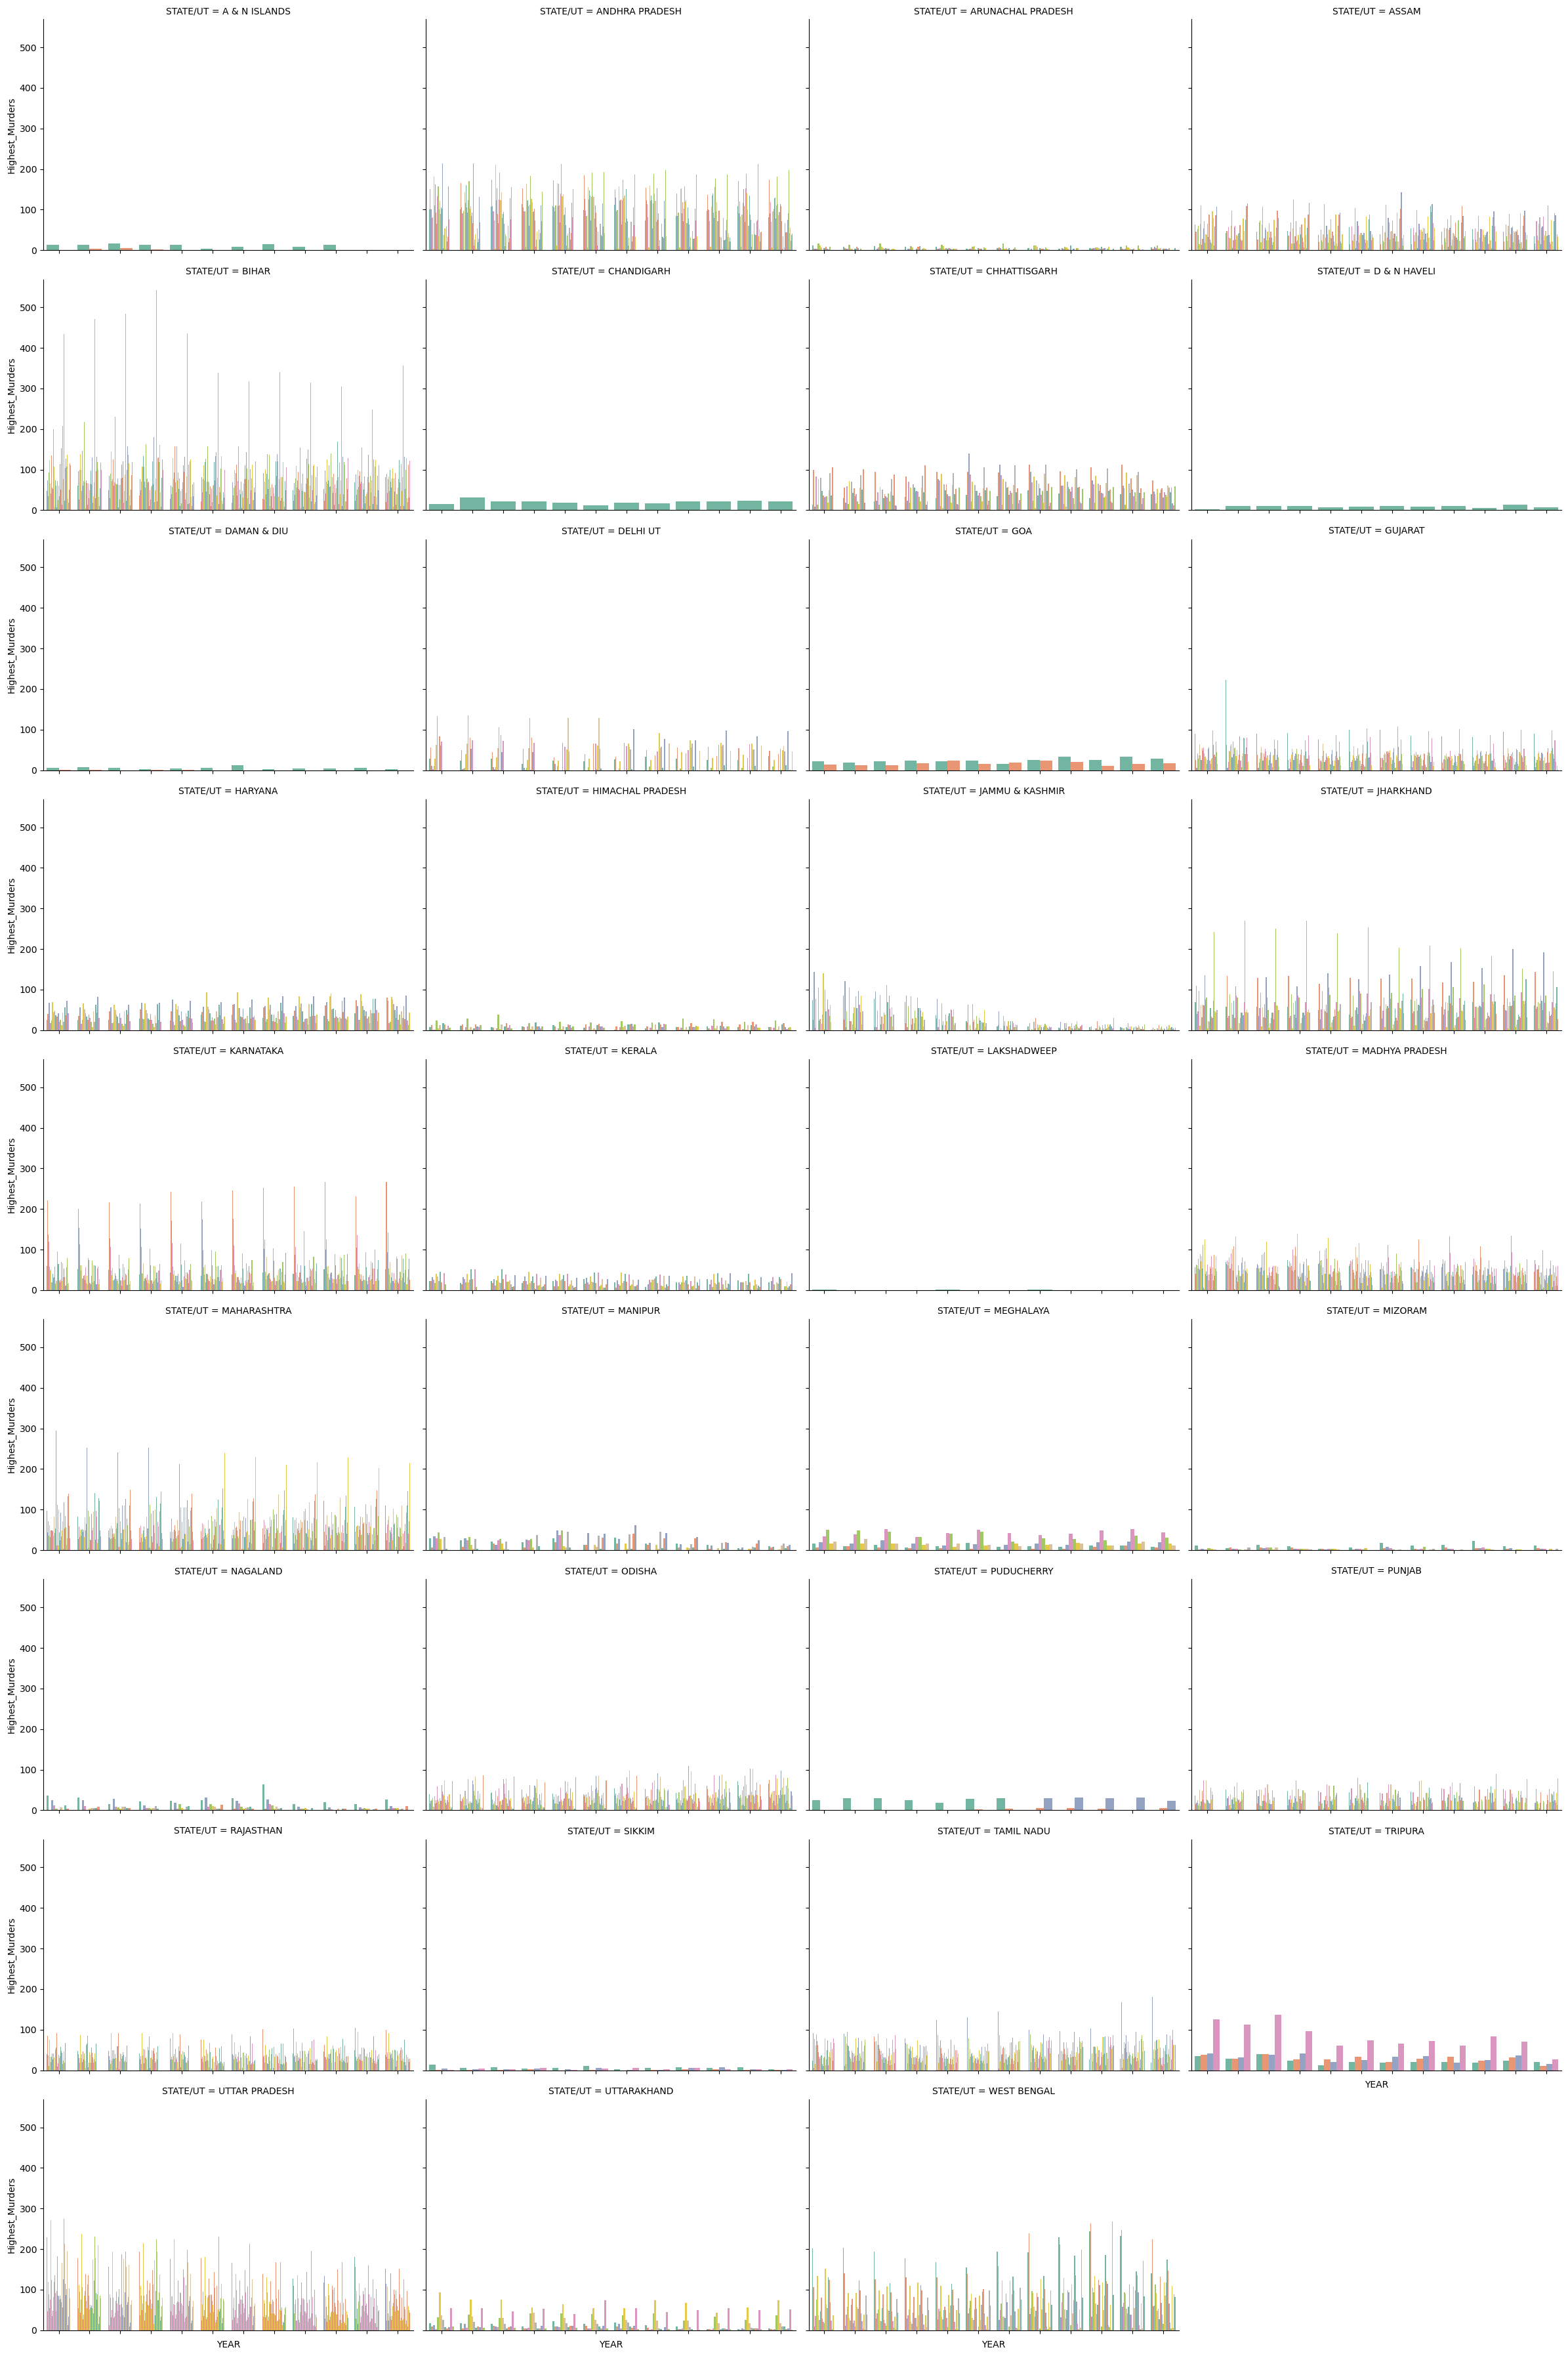

In [23]:
# Assuming 'sorted_data' is the DataFrame from the previous step
g = sns.FacetGrid(ipc_3, col="STATE/UT", col_wrap=4, height=4, aspect=1.5)
g = g.map(sns.barplot, "YEAR", "Highest_Murders", "DISTRICT", palette="Set2", ci=None)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45)

# Adjust the arrangement of the plots
g.tight_layout()

plt.show()

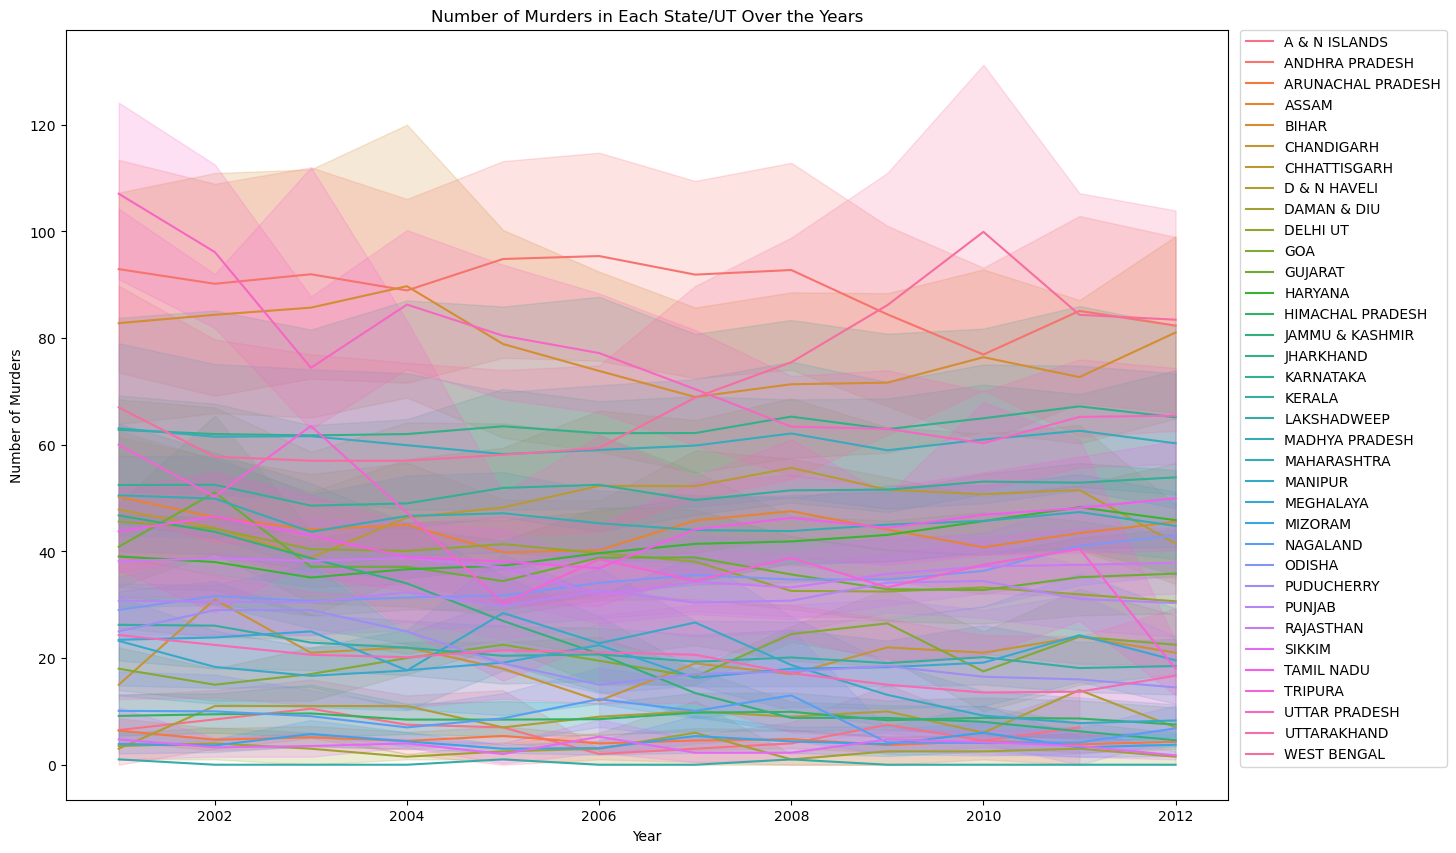

In [24]:

# Filter data from 2001 to 2012
filtered_data = ipc_3[(ipc_3['YEAR'] >= 2001) & (ipc_3['YEAR'] <= 2012)]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15,10))

# Draw a line plot with 'YEAR' on the x-axis and 'Highest_Murders' on the y-axis
sns.lineplot(x='YEAR', y='Highest_Murders', hue='STATE/UT', data=filtered_data, ax=ax)

# Set plot title and labels
ax.set_title('Number of Murders in Each State/UT Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Murders')

# Place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.show()

In [25]:
# Commit the transaction
conn.commit()

# Close the connection
conn.close()